In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_date.csv


In [2]:
df = pd.read_csv("/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_date.csv")
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
21848,2025-10-30,United Kingdom of Great Britain and Northern I...,Good,47
21849,2025-10-30,United States of America,Moderate,73
21850,2025-10-30,Uzbekistan,Good,25
21851,2025-10-30,Vatican,Good,42


Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21853 entries, 0 to 21852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       21853 non-null  object
 1   Country    21853 non-null  object
 2   Status     21853 non-null  object
 3   AQI Value  21853 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 683.0+ KB


In [4]:
df.describe()

,AQI Value
count,21853.000000
mean,62.337391
std,49.686767
min,1.000000
25%,29.000000
50%,52.000000
75%,82.000000
max,963.000000


In [5]:
print(df.isnull().sum())

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


Defining the problem:
What can be done next is to
1. To predict the AQI value (regression)
2. To predict the air quality (classification)

In [6]:
df.shape

(21853, 4)

In [7]:
df = df.dropna()
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
21848,2025-10-30,United Kingdom of Great Britain and Northern I...,Good,47
21849,2025-10-30,United States of America,Moderate,73
21850,2025-10-30,Uzbekistan,Good,25
21851,2025-10-30,Vatican,Good,42


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [9]:
df2 = pd.get_dummies(df, columns = ['Country'], drop_first = True)
label_encoder = LabelEncoder()
df2['Status2'] = label_encoder.fit_transform(df2['Status'])

In [10]:
df2

,Date,Status,AQI Value,Year,Month,Day,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uzbekistan,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Zambia,Status2
0,2022-07-21,Good,14,2022,7,21,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,2022-07-21,Moderate,65,2022,7,21,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,2022-07-21,Moderate,55,2022,7,21,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2
3,2022-07-21,Unhealthy for Sensitive Groups,113,2022,7,21,False,False,True,False,...,False,False,False,False,False,False,False,False,False,4
4,2022-07-21,Moderate,63,2022,7,21,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21848,2025-10-30,Good,47,2025,10,30,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
21849,2025-10-30,Moderate,73,2025,10,30,False,False,False,False,...,False,False,False,True,False,False,False,False,False,2
21850,2025-10-30,Good,25,2025,10,30,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
21851,2025-10-30,Good,42,2025,10,30,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0


In [11]:
print(f"Categories: {list(label_encoder.classes_)}")

Categories: ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']


In [12]:
print(df2[['Status', 'Status2']].head())

                           Status  Status2
0                            Good        0
1                        Moderate        2
2                        Moderate        2
3  Unhealthy for Sensitive Groups        4
4                        Moderate        2


Now we assign the values of x and y

In [13]:
y = df2['Status2']

In [14]:
X = df2.drop(columns=['Date', 'Status', 'AQI Value', 'Status2'])

In [15]:
X.head(10)

,Year,Month,Day,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uzbekistan,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Zambia
0,2022,7,21,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022,7,21,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,7,21,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022,7,21,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2022,7,21,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2022,7,21,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2022,7,21,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,2022,7,21,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,2022,7,21,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2022,7,21,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now to split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

this is a split of 80:20

In [17]:
X_train.shape

(17482, 144)

In [18]:
X_test.shape

(4371, 144)

For starter's, we'll go with 
### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Model Accuracy: {acc * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_dt, target_names = target))


Decision Tree Model Accuracy: 70.58%
                                precision    recall  f1-score   support

                          Good       0.83      0.81      0.82      2158
                     Hazardous       0.44      0.20      0.28        20
                      Moderate       0.67      0.67      0.67      1525
                     Unhealthy       0.42      0.51      0.46       181
Unhealthy for Sensitive Groups       0.46      0.48      0.47       445
                Very Unhealthy       0.17      0.14      0.15        42

                      accuracy                           0.71      4371
                     macro avg       0.50      0.47      0.47      4371
                  weighted avg       0.71      0.71      0.71      4371



Accuracy not good. Next we will go with 
### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy: {acc_rf * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_rf, target_names = target))


Random Forest Model Accuracy: 75.82%
                                precision    recall  f1-score   support

                          Good       0.84      0.88      0.86      2158
                     Hazardous       0.33      0.15      0.21        20
                      Moderate       0.72      0.70      0.71      1525
                     Unhealthy       0.52      0.54      0.53       181
Unhealthy for Sensitive Groups       0.56      0.52      0.54       445
                Very Unhealthy       0.35      0.19      0.25        42

                      accuracy                           0.76      4371
                     macro avg       0.56      0.50      0.52      4371
                  weighted avg       0.75      0.76      0.75      4371



next, 
### XG Boost Classifier

In [21]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 100, random_state = 42, eval_metric = 'mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Model Accuracy: {acc_xgb * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_xgb, target_names = target))


XGBoost Model Accuracy: 72.91%
                                precision    recall  f1-score   support

                          Good       0.77      0.91      0.84      2158
                     Hazardous       0.62      0.25      0.36        20
                      Moderate       0.69      0.64      0.66      1525
                     Unhealthy       0.55      0.50      0.53       181
Unhealthy for Sensitive Groups       0.62      0.30      0.40       445
                Very Unhealthy       0.50      0.10      0.16        42

                      accuracy                           0.73      4371
                     macro avg       0.63      0.45      0.49      4371
                  weighted avg       0.72      0.73      0.71      4371



next,
### AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"\nAdaBoost Model Accuracy: {acc_ada * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_ada, target_names=target))


AdaBoost Model Accuracy: 57.13%
                                precision    recall  f1-score   support

                          Good       0.62      0.91      0.73      2158
                     Hazardous       0.00      0.00      0.00        20
                      Moderate       0.47      0.27      0.35      1525
                     Unhealthy       0.36      0.13      0.19       181
Unhealthy for Sensitive Groups       0.49      0.21      0.30       445
                Very Unhealthy       0.03      0.02      0.03        42

                      accuracy                           0.57      4371
                     macro avg       0.33      0.26      0.27      4371
                  weighted avg       0.53      0.57      0.52      4371



Therefore, boosting models are not doing good.
Next,
### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Model Accuracy: {acc_lr * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_lr, target_names=target))


Logistic Regression Model Accuracy: 67.97%
                                precision    recall  f1-score   support

                          Good       0.77      0.86      0.81      2158
                     Hazardous       0.00      0.00      0.00        20
                      Moderate       0.59      0.70      0.64      1525
                     Unhealthy       0.27      0.07      0.11       181
Unhealthy for Sensitive Groups       0.48      0.11      0.18       445
                Very Unhealthy       0.00      0.00      0.00        42

                      accuracy                           0.68      4371
                     macro avg       0.35      0.29      0.29      4371
                  weighted avg       0.65      0.68      0.65      4371



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

We can try something completely different.
### KNN Classifier
It's logic is based on distance. The results may be poor since dataset requires Feature Scaling

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nKNN Model Accuracy: {acc_knn * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_knn, target_names=target))


KNN Model Accuracy: 58.02%
                                precision    recall  f1-score   support

                          Good       0.58      0.87      0.70      2158
                     Hazardous       0.00      0.00      0.00        20
                      Moderate       0.57      0.38      0.46      1525
                     Unhealthy       0.67      0.18      0.29       181
Unhealthy for Sensitive Groups       0.46      0.10      0.16       445
                Very Unhealthy       0.00      0.00      0.00        42

                      accuracy                           0.58      4371
                     macro avg       0.38      0.26      0.27      4371
                  weighted avg       0.56      0.58      0.53      4371



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled_model = KNeighborsClassifier(n_neighbors=5)
knn_scaled_model.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled_model.predict(X_test_scaled)
acc_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
print(f"\nKNN (Scaled) Model Accuracy: {acc_knn_scaled * 100:.2f}%")
target = label_encoder.classes_
print(classification_report(y_test, y_pred_knn_scaled, target_names=target))


KNN (Scaled) Model Accuracy: 74.74%
                                precision    recall  f1-score   support

                          Good       0.83      0.87      0.85      2158
                     Hazardous       0.40      0.30      0.34        20
                      Moderate       0.69      0.71      0.70      1525
                     Unhealthy       0.53      0.53      0.53       181
Unhealthy for Sensitive Groups       0.58      0.43      0.49       445
                Very Unhealthy       0.38      0.07      0.12        42

                      accuracy                           0.75      4371
                     macro avg       0.57      0.49      0.51      4371
                  weighted avg       0.74      0.75      0.74      4371



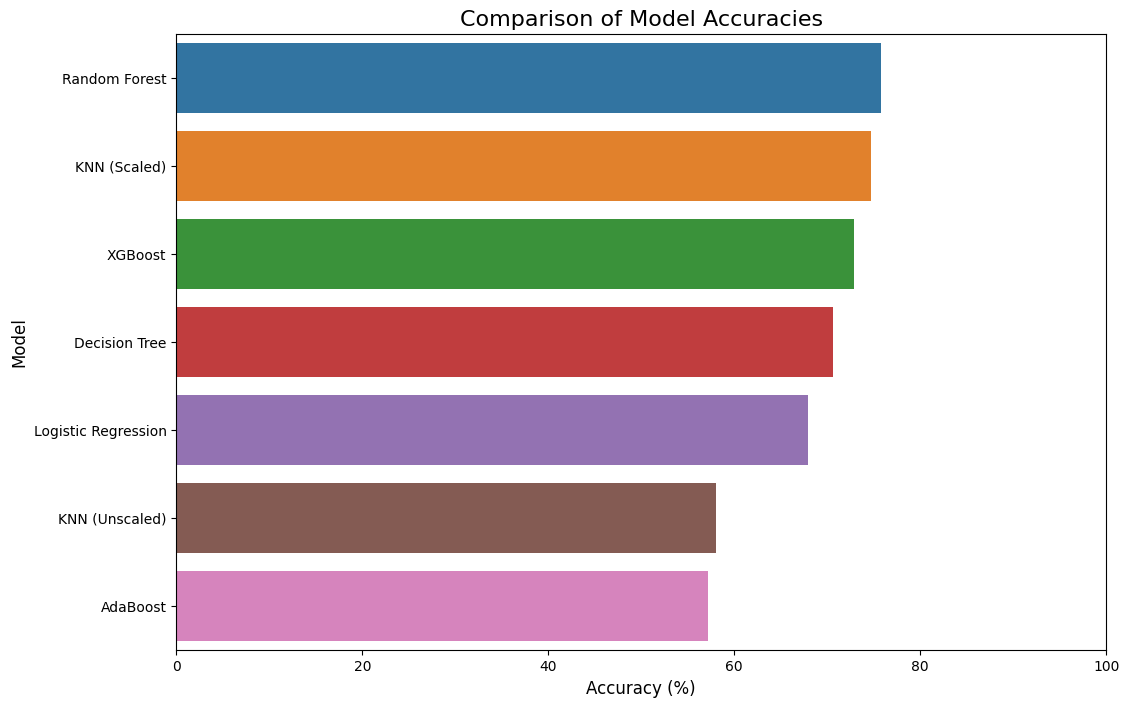

                 Model   Accuracy
1        Random Forest  75.817891
6         KNN (Scaled)  74.742622
2              XGBoost  72.912377
0        Decision Tree  70.578815
4  Logistic Regression  67.970716
5       KNN (Unscaled)  58.018760
3             AdaBoost  57.126516


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
model_accuracies = {
    'Decision Tree': acc,
    'Random Forest': acc_rf,
    'XGBoost': acc_xgb,
    'AdaBoost': acc_ada,
    'Logistic Regression': acc_lr,
    'KNN (Unscaled)': acc_knn,
    'KNN (Scaled)': acc_knn_scaled
}
results_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
results_df['Accuracy'] = results_df['Accuracy'] * 100
results_df = results_df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Accuracy', y='Model')
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 100)
plt.show()
print(results_df)

In this project, I compared seven different classification models to predict the AQI status based on date and country. The tree-based Random Forest model was the top performer with 75.8% accuracy, indicating that the data's patterns are highly non-linear. The most critical finding was the impact of data preparation: applying feature scaling to a K-Nearest Neighbors model improved its accuracy from 58.0% to 74.7%, demonstrating that proper data processing is essential for model performance.